In [30]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from tensorflow.keras import layers, models

In [2]:
#dataloader module
import Vision_Dataloader as vd

In [42]:
#reimport if necessary (edit file after already imported)
import importlib
importlib.reload(vd)

<module 'Vision_Dataloader' from '/Users/Temp/Data4380/Image Project - Watch Dataset/Vision_Dataloader.py'>

### Transfer Learning; Target = [Hour,Minute] (Regression)

In [43]:
train_ds,val_ds=vd.image_loader('watch_faces_train.parquet',target='list',batches=10)

Cause: could not parse the source code of <function image_loader.<locals>.<lambda> at 0x30719f0d0>: no matching AST found among candidates:
# coding=utf-8
lambda x: x['bytes']
# coding=utf-8
lambda x: tf.convert_to_tensor(x, dtype=tf.float32) / 255
# coding=utf-8
lambda img, label: (data_augmentation(img), label)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: could not parse the source code of <function image_loader.<locals>.<lambda> at 0x30719f0d0>: no matching AST found among candidates:
# coding=utf-8
lambda x: x['bytes']
# coding=utf-8
lambda x: tf.convert_to_tensor(x, dtype=tf.float32) / 255
# coding=utf-8
lambda img, label: (data_augmentation(img), label)
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [44]:
#checking correct tensor shape
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 2), dtype=tf.float32, name=None))>

In [63]:
def make_transfer_model(input_shape):
    # Load the pre-trained weights of ResNet50 and freeze the weights
    backbone = keras.applications.ResNet50(
        weights="imagenet",
        include_top=False,
        input_shape=input_shape,
    )
    backbone.trainable = False

    inputs = layers.Input(input_shape)
    x = keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(2, activation=None)(x)

    return keras.Model(inputs, outputs, name="keypoint_detector")

In [64]:
epochs = 8

model=make_transfer_model(input_shape=(256, 256, 3))

model.compile(optimizer='adam',loss=keras.losses.MeanSquaredError,metrics=['mae'])

history = model.fit(
    train_ds,
    epochs=epochs,
    validation_data=val_ds,
)

Epoch 1/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 449ms/step - loss: 578.6298 - mae: 16.7698 - val_loss: 577.0916 - val_mae: 16.1341
Epoch 2/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 371ms/step - loss: 494.4037 - mae: 14.6463 - val_loss: 497.3750 - val_mae: 14.4148
Epoch 3/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - loss: 426.4448 - mae: 13.3415 - val_loss: 431.0229 - val_mae: 13.2573
Epoch 4/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - loss: 362.3096 - mae: 12.5234 - val_loss: 374.5522 - val_mae: 12.4352
Epoch 5/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 361ms/step - loss: 312.6095 - mae: 11.4215 - val_loss: 327.8261 - val_mae: 11.7775
Epoch 6/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 357ms/step - loss: 279.1906 - mae: 10.8182 - val_loss: 289.2480 - val_mae: 11.2355
Epoch 7/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - loss: 236.0369 - mae: 9.9441 - val_loss: 257.6791 - val_mae: 10.7164
Epoch 8/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - loss: 217.7235 - mae: 9.7704 - val_loss: 232.6160 - val_mae: 10.2439


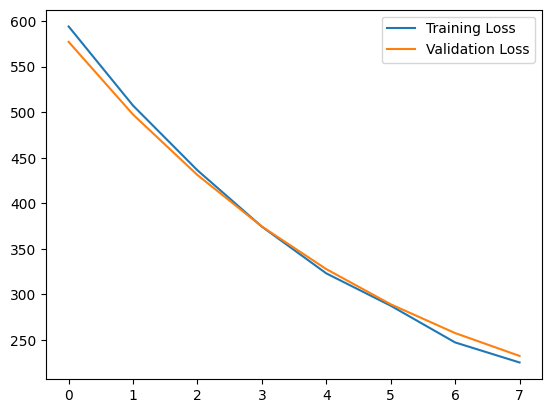

In [65]:
#mean squared error
plt.plot(range(len(history.history["loss"])),history.history["loss"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_loss"],label="Validation Loss")
plt.legend()

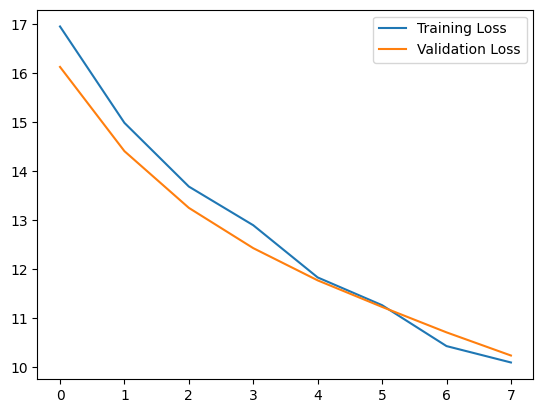

In [66]:
#mean absolute error
plt.plot(range(len(history.history['mae'])),history.history['mae'],label="Training Loss")
plt.plot(range(len(history.history['val_mae'])),history.history['val_mae'],label="Validation Loss")
plt.legend()

### Transfer Learning; Target = Minutes from Midnight (Regression)

In [23]:
train_ds2,val_ds2=vd.image_loader('watch_faces_train.parquet',target='minutes',batches=10)

In [70]:
def make_transfer_model2(input_shape):
    # Load the pre-trained weights of ResNet50 and freeze the weights
    backbone = keras.applications.ResNet50(
        weights="imagenet",
        include_top=False,
        input_shape=input_shape,
    )
    backbone.trainable = False

    inputs = layers.Input(input_shape)
    x = keras.applications.mobilenet_v2.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.GlobalAveragePooling2D()(x)

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(1, activation=None)(x) #output changed since this dataset only has one target column

    return keras.Model(inputs, outputs, name="keypoint_detector")

In [71]:
epochs = 8

model2=make_transfer_model2(input_shape=(256, 256, 3))

model2.compile(optimizer='adam',loss=keras.losses.MeanSquaredError,metrics=['mae'])

history2 = model2.fit(
    train_ds2,
    epochs=epochs,
    validation_data=val_ds2,
)

Epoch 1/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 440ms/step - loss: 177766.8594 - mae: 381.1876 - val_loss: 205803.9844 - val_mae: 416.3847
Epoch 2/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 380ms/step - loss: 175568.5781 - mae: 378.3551 - val_loss: 203383.5625 - val_mae: 413.4681
Epoch 3/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 370ms/step - loss: 173301.6250 - mae: 375.3453 - val_loss: 200986.0312 - val_mae: 410.5585
Epoch 4/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - loss: 171137.1250 - mae: 372.3988 - val_loss: 198608.2812 - val_mae: 407.6525
Epoch 5/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - loss: 168937.1562 - mae: 369.4834 - val_loss: 196254.5938 - val_mae: 404.7553
Epoch 6/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 364ms/step - loss: 167056.3438 - mae: 366.9208 - val_loss: 193940.5156 - val_mae: 401.8865
Epoch 7/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 372ms/step - loss: 164766.0156 - mae: 363.8713 - val_loss: 191646.0000 - val_mae: 399.0217
Epoch 8/8
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 363ms/step - loss: 162776.4219 - mae: 361.0

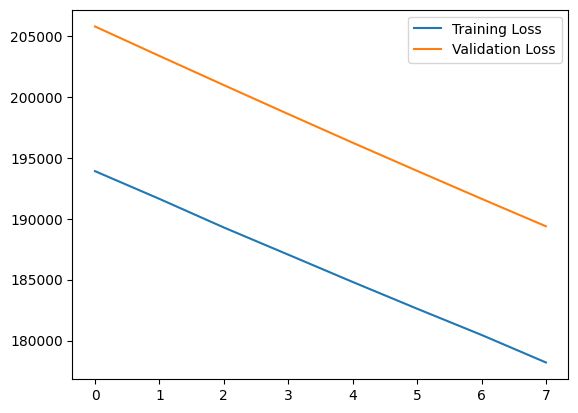

In [74]:
#mean squared error
plt.plot(range(len(history2.history["loss"])),history2.history["loss"],label="Training Loss")
plt.plot(range(len(history2.history["val_loss"])),history2.history["val_loss"],label="Validation Loss")
plt.legend()

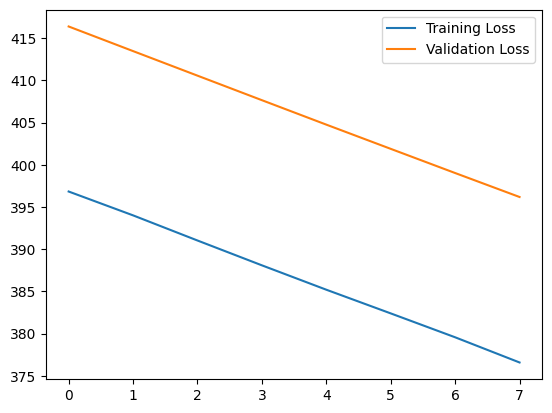

In [75]:
#mean absolute error
plt.plot(range(len(history2.history['mae'])),history2.history['mae'],label="Training Loss")
plt.plot(range(len(history2.history['val_mae'])),history2.history['val_mae'],label="Validation Loss")
plt.legend()